# Table of Contents
 <p>

In this practice we will perform topic modeling and sentiment analysis on two datasets.

# Activity 1: Load the kaggle voted dataset and perform following tasks 

* Focus on the "Description" column and preprocess if required
* Fit an LDA model with 10 topics on the "Description" column 
    * While creating TF matrix ignore terms that have a document frequency strictly higher than 100
* Print top-5 words per topic

### Load data file

In [1]:
# load necessary packages
import json
import pandas as pd
import re

In [2]:
filepath = "/dsa/data/DSA-8410/voted-kaggle-dataset.csv"

df = pd.read_csv(filepath, encoding = 'utf-8')
print(df['Description'].head(5))

0    The datasets contains transactions made by cre...
1    The ultimate Soccer database for data analysis...
2    Background\nWhat can we say about the success ...
3    Context\nInformation on more than 170,000 Terr...
4    Context\nBitcoin is the longest running and mo...
Name: Description, dtype: object


### Create a TF matrix

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation


In [4]:
print(df.shape)
desc = df['Description'].dropna()
print(desc.shape)

(2150, 15)
(2145,)


In [5]:
docs = desc.values
countVectorizer = CountVectorizer(stop_words='english', max_df=100 )
termFrequency = countVectorizer.fit_transform(docs)
featureNames = countVectorizer.get_feature_names()

### Fit an LDA model

In [6]:
lda = LatentDirichletAllocation(n_components=10)
lda.fit(termFrequency)    

LatentDirichletAllocation()

### Print top 10 words per topic

In [7]:
for idx, topic in enumerate(lda.components_):
    print("Topic ", idx, " ".join(featureNames[i] for i in topic.argsort()[:-10 - 1:-1]))

Topic  0 york numeric twitter species registration da status element zillow home
Topic  1 station weather air race horse street temperature hour measured standard
Topic  2 tweet tweets wine speech uci dub lub twitter activity survey
Topic  3 pokemon players songs song vectors play performance labels sports speed
Topic  4 player police survey crime children food federal shot txt cases
Topic  5 en sold college child sales uber les la el que
Topic  6 integer strongly interested enjoy agree disagree reviews software largest don
Topic  7 percent float south mean net old kumar numeric american north
Topic  8 trained movie player movies news recognition dry networks languages rating
Topic  9 numeric india bitcoin stock nominal market low census 01 volume


# Activity 2: Load the Twitter US Airline Sentiment data and perform the following task

* Preprocess the text column with the removal of all the mentions 
* Identify sentiment (pos, neg, neu) for each of the tweets using the standard rule mentioned in the lab
* Print the classification report

### Load data file

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report

In [9]:
filepath = "/dsa/data/DSA-8410/Twitter-US-Airline-Sentiment/Tweets.csv"
# filepath = "../../../../data/Twitter-US-Airline-Sentiment/Tweets.csv"

df_all= pd.read_csv(filepath)
df_all.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

### Preprocess the tweets

In [10]:
tweets = [re.sub(r'@(\w+)', ' ', t) for t in df_all['text'].values]

### Identify polarity for each tweet 

In [11]:
analyzer = SentimentIntensityAnalyzer()
tweets_sentiment = [analyzer.polarity_scores(t) for t in tweets]

df = pd.DataFrame(tweets_sentiment)
df['tweet'] = tweets
df.head()

neg    neu  pos  compound  \
0  0.000  1.000  0.0    0.0000   
1  0.000  1.000  0.0    0.0000   
2  0.000  1.000  0.0    0.0000   
3  0.259  0.741  0.0   -0.5984   
4  0.351  0.649  0.0   -0.5829   

                                               tweet  
0                                       What   said.  
1    plus you've added commercials to the experie...  
2    I didn't today... Must mean I need to take a...  
3    it's really aggressive to blast obnoxious "e...  
4           and it's a really big bad thing about it

In [12]:
df.describe()

neg           neu           pos      compound
count  14640.000000  14640.000000  14640.000000  14640.000000
mean       0.089417      0.777355      0.133227      0.052397
std        0.120441      0.187613      0.181640      0.456590
min        0.000000      0.000000      0.000000     -0.966800
25%        0.000000      0.672000      0.000000     -0.296000
50%        0.000000      0.797000      0.072000      0.000000
75%        0.156000      0.913000      0.210000      0.437400
max        1.000000      1.000000      1.000000      0.976000

### Perform a rule-base classification

In [13]:
df['sentiment'] = 'NEU'
df.loc[df['compound'] > 0, 'sentiment'] = 'POS'
df.loc[df['compound'] <= 0, 'sentiment'] = 'NEG'

df.head()

neg    neu  pos  compound  \
0  0.000  1.000  0.0    0.0000   
1  0.000  1.000  0.0    0.0000   
2  0.000  1.000  0.0    0.0000   
3  0.259  0.741  0.0   -0.5984   
4  0.351  0.649  0.0   -0.5829   

                                               tweet sentiment  
0                                       What   said.       NEG  
1    plus you've added commercials to the experie...       NEG  
2    I didn't today... Must mean I need to take a...       NEG  
3    it's really aggressive to blast obnoxious "e...       NEG  
4           and it's a really big bad thing about it       NEG

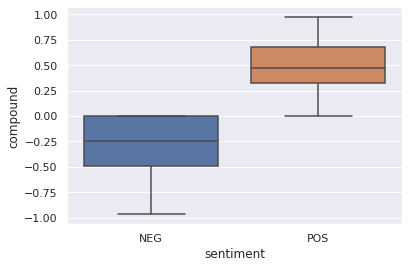

In [14]:
%matplotlib inline
import seaborn as sns
sns.set()
sns.boxplot(x="sentiment", y="compound", data=df);

### Report classification metrices

In [15]:
y_true = df_all["airline_sentiment"].map({'neutral': 'NEU', 'positive': 'POS', 'negative': 'NEG'})
y_pred = df['sentiment']
print(classification_report(y_true, y_pred))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         NEG       0.76      0.70      0.73      9178
         NEU       0.00      0.00      0.00      3099
         POS       0.33      0.87      0.48      2363

    accuracy                           0.58     14640
   macro avg       0.36      0.52      0.40     14640
weighted avg       0.53      0.58      0.53     14640



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Save your notebook, then `File > Close and Halt`